In [8]:
import numpy as np
import torch
from models import Generator
import matplotlib.pyplot as plt
import torchvision.utils as vutils

In [2]:
model_path = "./models/first_model_299"

In [21]:
def get_netG(model_path):
    device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

    # Load Model
    checkpoint = torch.load("".join([model_path, ".pt"]), map_location=device)
    nz = checkpoint["latent_vector_size"]
    ngf = checkpoint["feature_maps_size"]
    nc = checkpoint["channels_num"]
    netG_params = {
        "latent_vector_size": nz,
        "feature_maps_size": ngf,
        "channels_num": nc
    }
    # Crate and load generator
    netG = Generator(**netG_params).to(device)
    netG.load_state_dict(checkpoint["netG_state_dict"])
    print(netG)
    netG.eval()
    
    return netG

In [31]:
netG = get_netG(model_path)

latent_code = torch.randn(1, nz, 1, 1, device=device)

print(type(latent_code))
print(latent_code)

def generate_image(latent_code):
        img = netG(latent_code).detach().numpy().squeeze()
        plt.imshow(np.transpose(img, (1,2,0)))

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


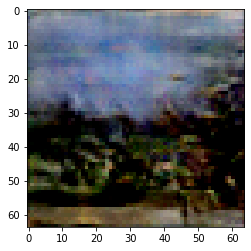

In [23]:
generate_image(latent_code)

In [29]:
def generate_and_plot(netG, num, nz, device, model_name, fig_size=(10,10)):
    imgs = netG(torch.randn(num, nz, 1, 1, device=device)).detach()
    _ = plt.figure(figsize=fig_size)
    plt.axis("off")
    plt.title(f"Generated Images from Model {model_name}")
    plt.imshow(np.transpose(vutils.make_grid(imgs, nrow=int(np.sqrt(num)), padding=5, normalize=True), (1,2,0)))

tensor([[[0.8322, 0.8508, 0.8790,  ..., 0.7181, 0.7361, 0.7793],
         [0.8159, 0.8183, 0.8152,  ..., 0.7104, 0.5958, 0.7974],
         [0.7538, 0.7530, 0.8048,  ..., 0.6432, 0.5628, 0.8029],
         ...,
         [0.8625, 0.9077, 0.9005,  ..., 0.8506, 0.8578, 0.8981],
         [0.8506, 0.7342, 0.6969,  ..., 0.8437, 0.8798, 0.8964],
         [0.8118, 0.6426, 0.3951,  ..., 0.8558, 0.8569, 0.8442]],

        [[0.7671, 0.7954, 0.7861,  ..., 0.4834, 0.5812, 0.6803],
         [0.7496, 0.7218, 0.7107,  ..., 0.4783, 0.4821, 0.7102],
         [0.6755, 0.6988, 0.7330,  ..., 0.4795, 0.4680, 0.7198],
         ...,
         [0.7661, 0.9013, 0.8627,  ..., 0.8021, 0.8409, 0.8739],
         [0.7831, 0.7333, 0.6686,  ..., 0.8153, 0.8623, 0.8553],
         [0.7504, 0.6293, 0.3632,  ..., 0.8314, 0.8221, 0.8169]],

        [[0.5982, 0.6341, 0.6777,  ..., 0.2978, 0.3629, 0.4865],
         [0.6225, 0.5724, 0.5679,  ..., 0.2873, 0.2140, 0.5396],
         [0.5673, 0.5750, 0.6093,  ..., 0.2940, 0.2762, 0.

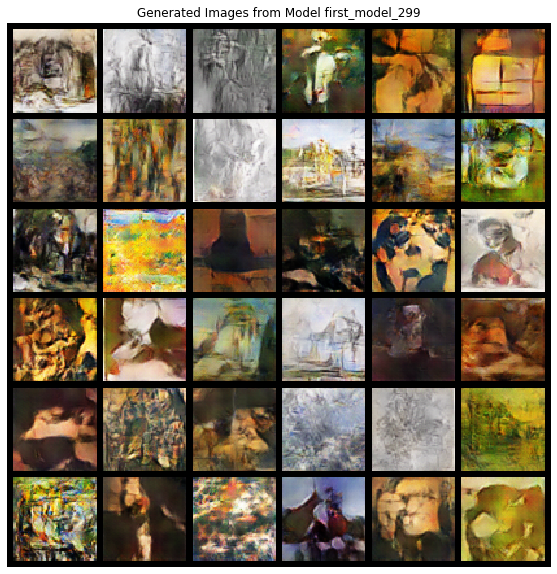

In [28]:
generate_and_plot(netG, 36, nz, device, model_path.split("/")[-1])